# Image Classification with Convolutional Neural Network: Traffic Signal Images


In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential

## Load Image data
The dataset is obtained from [gtsrb-german-traffic-sign](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign).
the images is loaded in a single list in form of an array that will describe the pixels of the image and another list which will contain labels of the corresponding image. To feed image data to the model we need to convert it into a NumPy array. 
The training dataset contains a different folder with the name of classes named 0 to 42. with the help of the os module we will iterate through each class folder and append the image and respective label to the list. we also have CSV files that contain the actual label category name.

In [5]:
imgs_path = "gtsrb-german-traffic-sign/Train"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(img_path + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

success


## Explore an Image
We look at an image from the dataset using pillow library. 

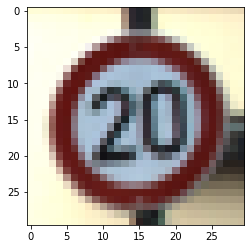

In [8]:
path = "gtsrb-german-traffic-sign/Train/0/00000_00004_00029.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()
#Image classification | sample image

## Split Dataset into train and test
'to_categorical' method to convert labels into one-hot encoding. test_size is set to 0.2

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


## Build a CNN model

The architecture of our CNN model

- Conv2D layer –  we will add 2 convolutional layers of 32 filters, size of 5*5, and activation as relu
- Max Pooling – MaxPool2D with 2*2 layers
- Dropout with a rate of 0.25.0
- 2 Convolutional layer of 64 filters and size of 3*3
- Dropout with a rate of 0.25
-  Flattenn layer to squeeze the layers into 1 dimension
- Dense, feed-forward neural network(256 nodes, activation=”relu”)
- Dropout Layer(0.5)
- Dense layer(nodes=46, activation=”softmax”)
- MaxPool2D – Maximum pooling layer is used to reduce the size of images
- Dropout – Dropout is a regularization technique to reduce overfitting
- Flatten – to convert the parrel layers to squeeze the layers
- Dense –  for feed-forward neural network
the last layer have an activation function as softmax for Multi-class classification.

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

## Train and Validate the Model

let’s first compile the model. during compiling we need to describe the loss function and optimizer to use.

- Loss Function – to calculate the loss done by model. we will use categorical cross-entropy as we have a multiclass classification problem statement
- Optimizer – Optimize to optimize the loss function


In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Let’s fit the train and test data to model and start training the convolutional model. we need to define a number of epochs to train for and batch size to consider while training the model.


In [13]:
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 56s 113ms/step - loss: 2.1406 - accuracy: 0.4725 - val_loss: 0.5352 - val_accuracy: 0.8789
Epoch 2/15
491/491 [==============================] - 61s 124ms/step - loss: 0.5943 - accuracy: 0.8270 - val_loss: 0.1472 - val_accuracy: 0.9676
Epoch 3/15
491/491 [==============================] - 60s 123ms/step - loss: 0.3560 - accuracy: 0.8986 - val_loss: 0.0753 - val_accuracy: 0.9815
Epoch 4/15
491/491 [==============================] - 62s 126ms/step - loss: 0.2534 - accuracy: 0.9265 - val_loss: 0.0862 - val_accuracy: 0.9779
Epoch 5/15
491/491 [==============================] - 60s 123ms/step - loss: 0.2137 - accuracy: 0.9396 - val_loss: 0.0989 - val_accuracy: 0.9750
Epoch 6/15
491/491 [==============================] - 56s 115ms/step - loss: 0.2149 - accuracy: 0.9399 - val_loss: 0.0479 - val_accuracy: 0.9871
Epoch 7/15
491/491 [==============================] - 57s 116ms/step - loss: 0.1642 - accuracy: 0.9548 - val_loss: 0.0349 - val_ac


Now let us plot an accuracy and loss graph using Matplotlib.

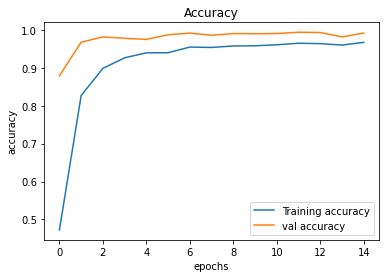

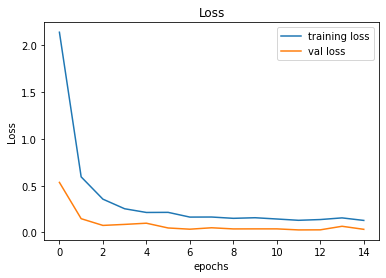

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Test the Model 
The dataset contains a test folder that has different test images and a test.csv file that contains details related to the image path and respective labels. Again we will load the data using pandas and resize it to the shape of 30*30 pixels and convert it to a NumPy array. After processing test images we will check the accuracy of the model against actual labels

In [15]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("gtsrb-german-traffic-sign/Test.csv")
test_labels = test['ClassId'].values
test_img_path = "gtsrb-german-traffic-sign"
test_imgs = test['Path'].values

test_data = []
test_labels = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

test_data = np.array(test_data)
print(test_data.shape)

import warnings
warnings.filterwarnings("ignore")
test_labels = test['ClassId'].values
test_labels

predictions = model.predict(test_data)
classes=np.argmax(predictions,axis=1)

print("accuracy: ", accuracy_score(test_labels, classes))

(12630, 30, 30, 3)
accuracy:  0.9679334916864608


Save the Model
Save the model for future use as well.

In [16]:
model.save('traffic_classifier.h5')